In [ ]:
!unzip "/content/drive/MyDrive/archive (16).zip"

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
!pip install split-folders

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tensorflow as tf
import cv2

from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense,Dropout
from tensorflow.keras.optimizers.legacy import SGD,Adam
import matplotlib.pyplot as plt

from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders

In [2]:
os.listdir('/content/cell_images')

['cell_images', 'Uninfected', 'Parasitized']

In [3]:
path_main = '/content/cell_images'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder))
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    print(f'Item\'s name: {list_of_elements[0]}\n')
    print('***************************')

Folder: cell_images

Number of elements: 2

Item's name: Uninfected

***************************
Folder: Uninfected

Number of elements: 13780

Item's name: C144P105ThinF_IMG_20151015_155149_cell_79.png

***************************
Folder: Parasitized

Number of elements: 13780

Item's name: C179P140ThinF_IMG_20151127_153420_cell_174.png

***************************


In [4]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [5]:
path_parasitized = '/content/cell_images/Parasitized'
path_uninfected = '/content/cell_images/Uninfected'


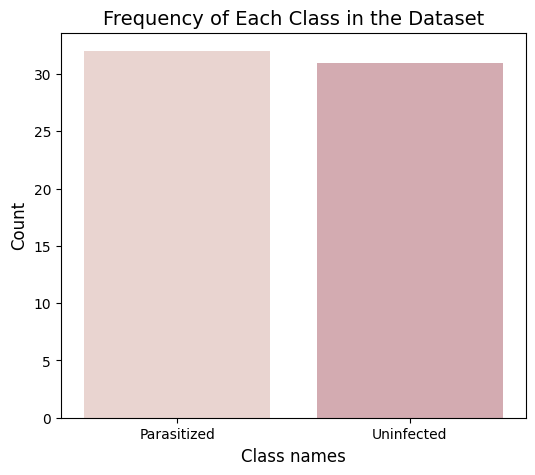

In [6]:
import plotly.express as px
class_names = ['Parasitized', 'Uninfected']

parasitized = len(path_parasitized)
uninfected = len(path_uninfected)


images = [parasitized, uninfected]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette())
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()
px.pie(names= class_names, values= images, color_discrete_sequence=px.colors.sequential.BuGn)

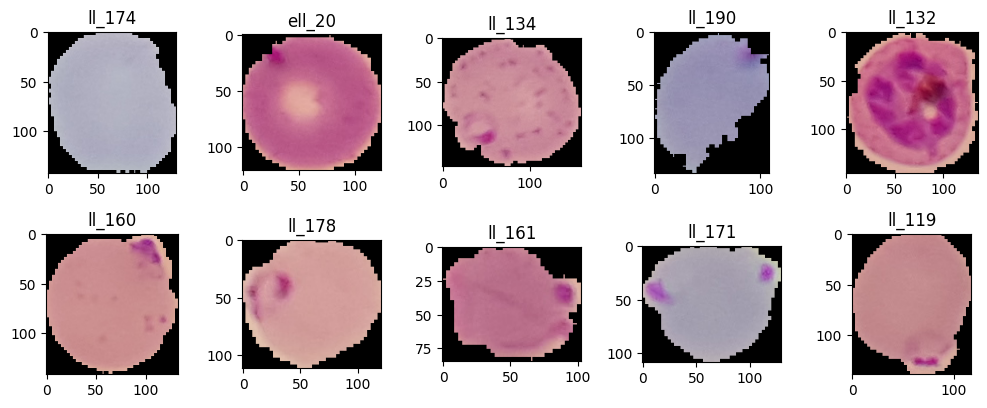

In [7]:
plot_imgs(path_parasitized, 10)

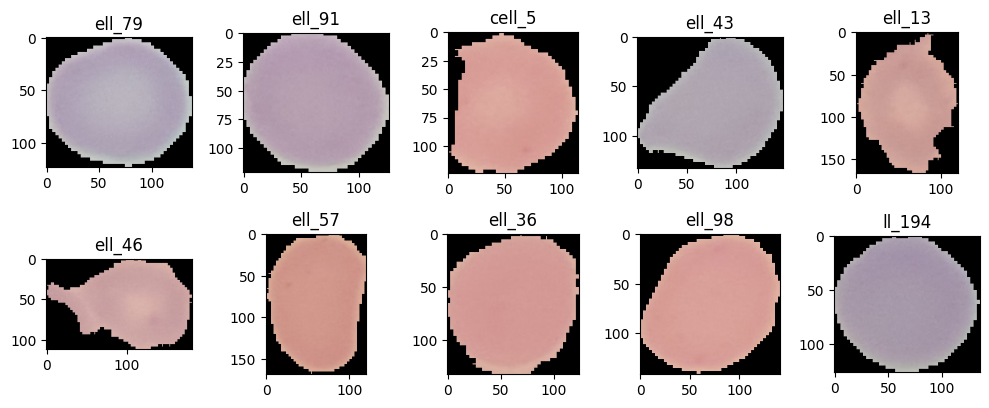

In [8]:
plot_imgs(path_uninfected, 10)

In [9]:
splitfolders.ratio(
    "/content/cell_images",
   output="outputdata",
   seed=7,
   ratio=(0.5,0.4, 0.1)
)

Copying files: 27560 files [00:10, 2509.29 files/s]


In [10]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [28]:
train_dataset = train_datagen.flow_from_directory('/content/outputdata/train',
                                                  target_size=(150, 150),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  shuffle=True
                                                  )

test_dataset = test_datagen.flow_from_directory('/content/outputdata/test',
                                                target_size=(150, 150),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=True
                                                )

valid_dataset = valid_datagen.flow_from_directory('/content/outputdata/val',
                                                  target_size=(150, 150),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  shuffle=True
                                                  )

Found 13780 images belonging to 3 classes.
Found 2756 images belonging to 3 classes.
Found 11022 images belonging to 3 classes.


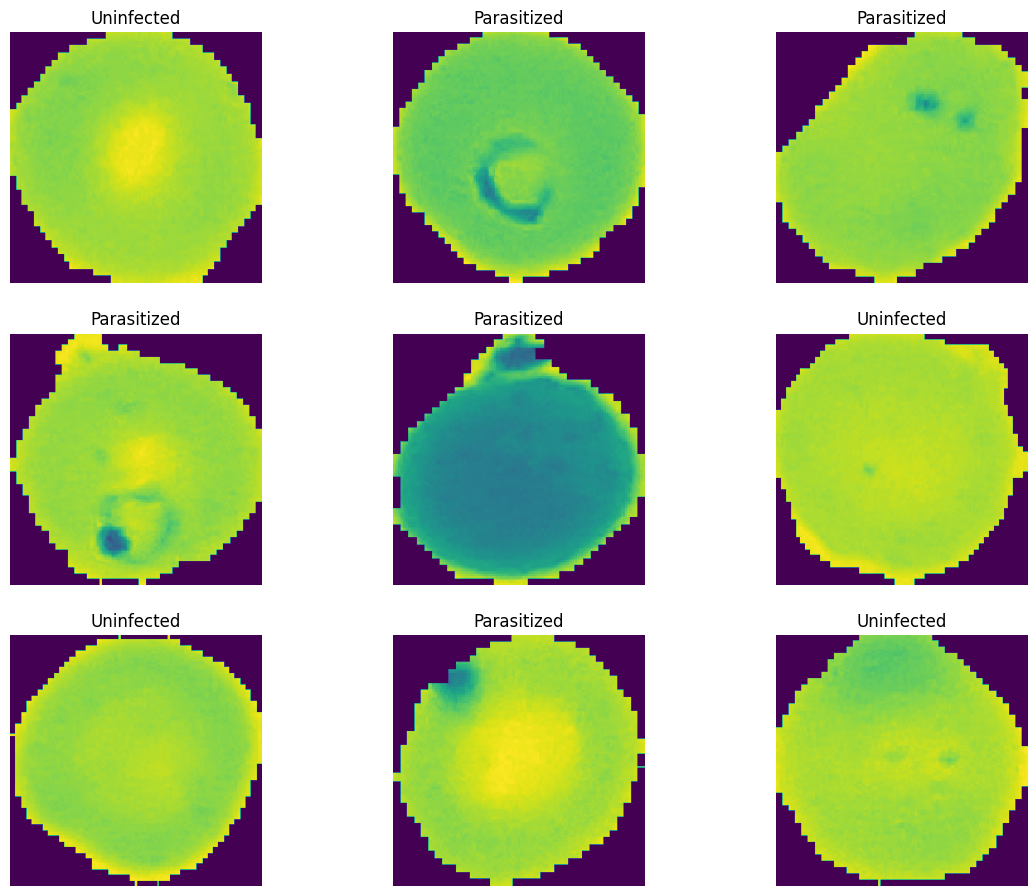

In [25]:
class_names = ['Parasitized', 'Uninfected']

def class_type(dataset, n_images):

    i = 1
    images, labels = dataset.next()
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))

    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[np.argmax(label)])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

class_type(train_dataset, 10)

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 37, 37, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 35, 35, 64)       

In [31]:
history = model.fit(
    train_dataset,

    epochs=50,

    validation_data=valid_dataset,

)

Epoch 1/50
138/138 [==============================] - 385s 3s/step - loss: 0.6733 - accuracy: 0.5827 - val_loss: 0.6696 - val_accuracy: 0.6147
Epoch 2/50
138/138 [==============================] - 384s 3s/step - loss: 0.6308 - accuracy: 0.6439 - val_loss: 0.6249 - val_accuracy: 0.6606
Epoch 3/50
138/138 [==============================] - 379s 3s/step - loss: 0.5948 - accuracy: 0.6776 - val_loss: 0.6112 - val_accuracy: 0.6864
Epoch 4/50
138/138 [==============================] - 369s 3s/step - loss: 0.5654 - accuracy: 0.7035 - val_loss: 0.5532 - val_accuracy: 0.7220
Epoch 5/50
138/138 [==============================] - 379s 3s/step - loss: 0.5226 - accuracy: 0.7382 - val_loss: 0.5285 - val_accuracy: 0.7369
Epoch 6/50
138/138 [==============================] - 364s 3s/step - loss: 0.4675 - accuracy: 0.7815 - val_loss: 0.4837 - val_accuracy: 0.7585
Epoch 7/50
138/138 [==============================] - 366s 3s/step - loss: 0.4031 - accuracy: 0.8200 - val_loss: 0.4859 - val_accuracy: 0.7819

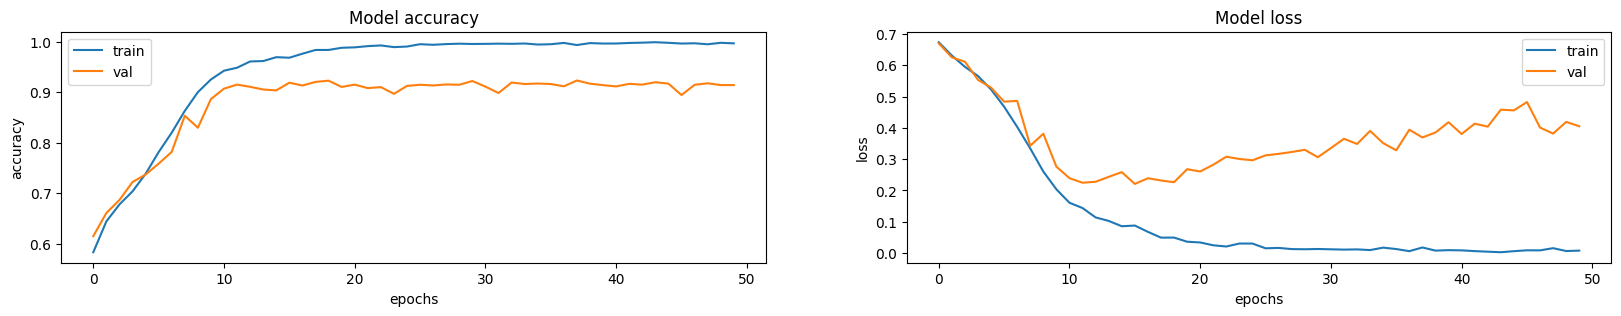

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [36]:
predictions = model.predict(test_dataset)

28/28 [==============================] - 18s 624ms/step


4/4 [==============================] - 1s 100ms/step


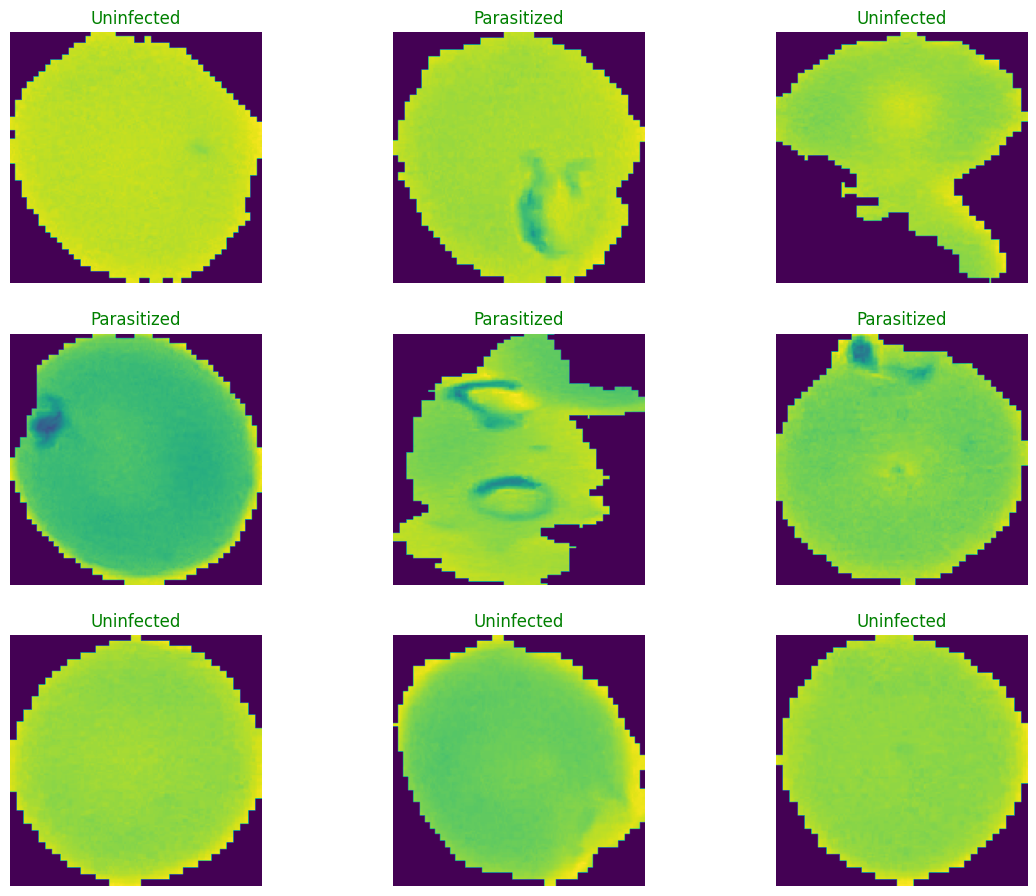

In [37]:
def class_prediction(dataset, n_images):
    i = 1
    images, labels = dataset.next()

    predictions = model.predict(images)
    pred = np.argmax(predictions, axis=1)
    labels = np.argmax(labels, axis= 1)
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if pred[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

class_prediction(test_dataset, 10)

In [38]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [47]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(5,5))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.49201741654571846
Precision: 0.4920032497678737
Recall: 0.49201741654571846
F1_score: 0.49179233557933094


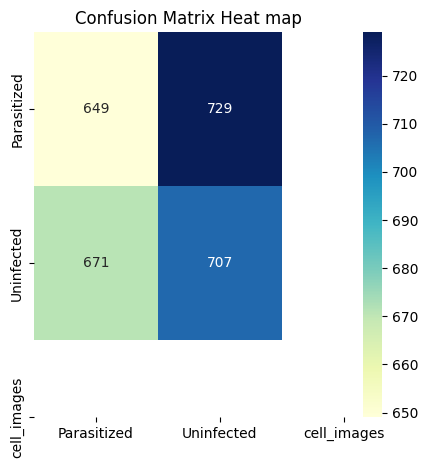

In [48]:
evaluate(test_dataset.classes,predictions)

In [41]:
model.evaluate(test_dataset)

28/28 [==============================] - 17s 612ms/step - loss: 0.3966 - accuracy: 0.9129


[0.39664706587791443, 0.9129172563552856]

In [42]:
y_pred = np.argmax(predictions, axis = 1)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [43]:
y_true = test_dataset.classes

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[649, 729],
       [671, 707]])

In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.47      0.48      1378
           1       0.49      0.51      0.50      1378

    accuracy                           0.49      2756
   macro avg       0.49      0.49      0.49      2756
weighted avg       0.49      0.49      0.49      2756



<Axes: >

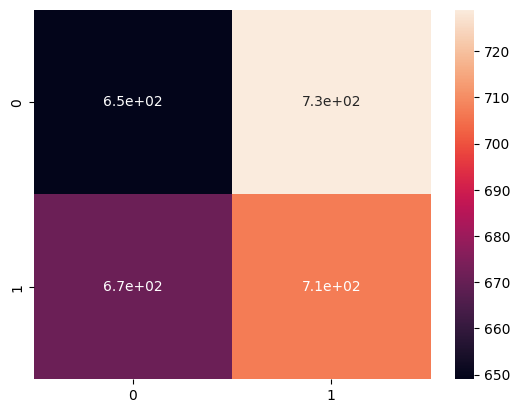

In [46]:
import seaborn as sns
sns.heatmap(cm, annot = True)